In [1]:
from tensorflow.keras.datasets import mnist
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import  random


# PART I:  Implementing

In [2]:
def pca(X):
  # Compute the mean of the columns of X
  mean = np.mean(X, axis=0)

  # Center the data by subtracting the mean from each column
  X_centered = X - mean

  # Compute the SVD of the centered data
  U, s, Vh = np.linalg.svd(X_centered)

  # The principal components are the columns of Vh
  vectors = Vh.T

  # The corresponding eigenvalues are in s
  weights = s

  return mean, weights, vectors


# Part II: Using PCA before Classification

In [3]:
def random_choises(k):
    inds = []
    for _  in range(k):
        inds.append(random.randint(0,6000))
    return  inds

In [4]:
# load mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
X_train = train_images.reshape(60000, 784)
X_test = test_images.reshape(10000, 784)
ind = random_choises(1000)
X = np.array([X_train[i] for i in ind ])
y = np.array([train_labels[i] for i in ind])

In [26]:

def pca_reduction(test_data,n_components,eigenvalues,mean_vector):
    selected_vectors = eigenvalues[:, :n_components]
    X_reduced = np.dot(test_data - mean_vector, selected_vectors)
    return X_reduced




In [6]:
def plot_class_locations(reduced_data,labels ,n_components):
    plt.figure(figsize=(10, 5))

    plt.suptitle(rf'{n_components} N_components Visualization')
    plt.subplot(1, 2, 1)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=10)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Class Locations (PC1 vs PC2)')


    plt.subplot(1, 2, 2)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 2], c=labels, cmap='viridis', s=10)
    plt.xlabel('First Principal Component')
    plt.ylabel('Third Principal Component')
    plt.title('Class Locations (PC1 vs PC3)')

    plt.tight_layout()
    plt.show()

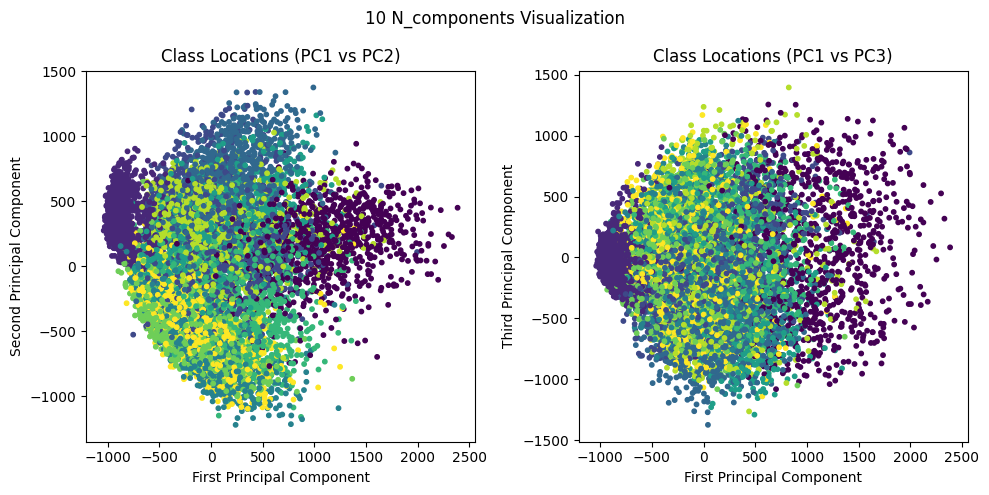

*******************************************************************************************


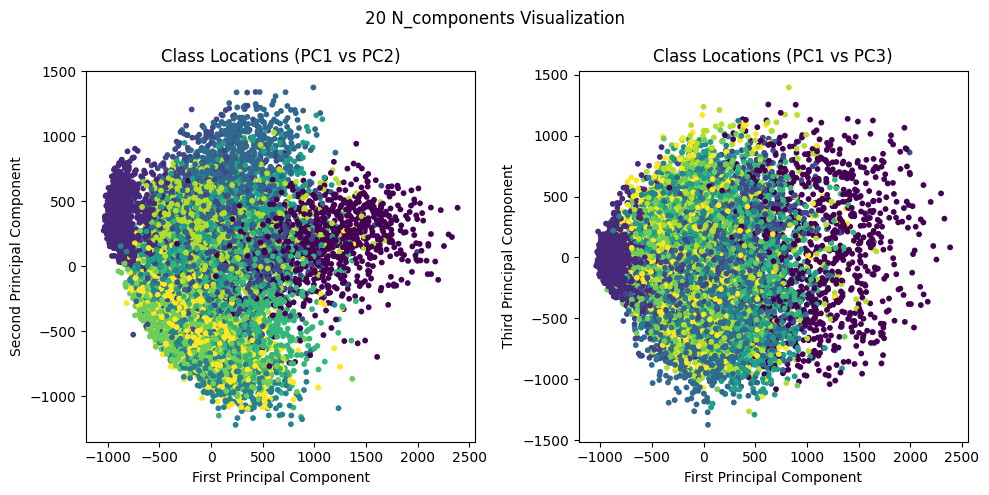

*******************************************************************************************


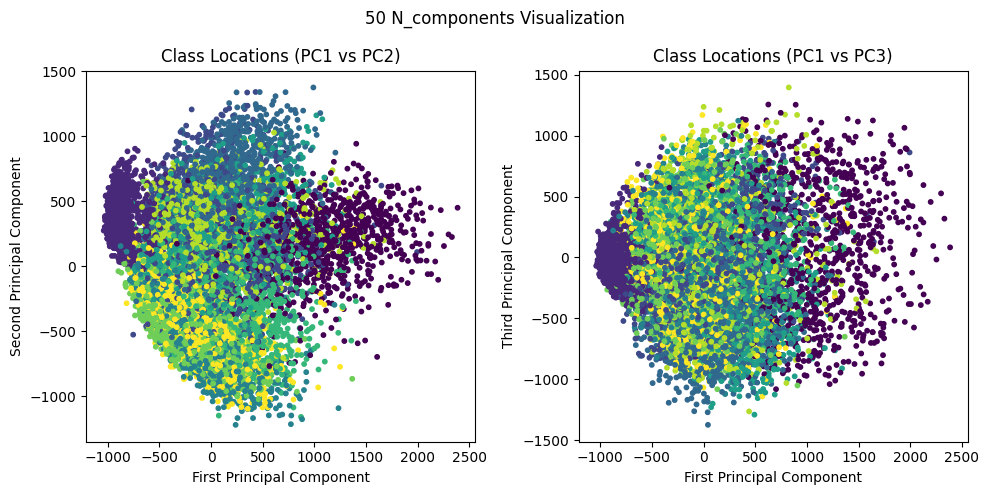

*******************************************************************************************


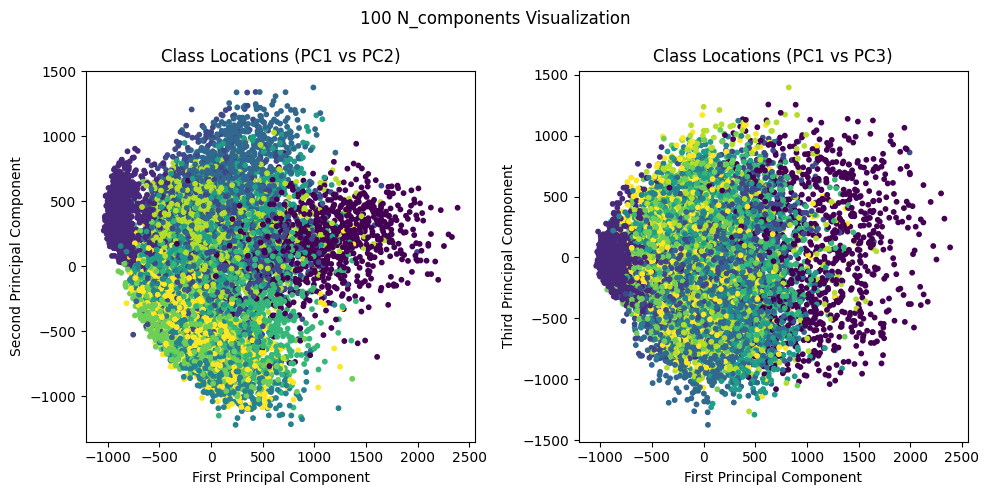

*******************************************************************************************


In [7]:
mean_vector, principal_components, eigenvalues = pca(X)
for n_components in  [10, 20, 50, 100]:
    reduced_data = pca_reduction(X_test,n_components,eigenvalues,mean_vector)
    plot_class_locations(reduced_data,test_labels,n_components)
    print('*******************************************************************************************')

## RandomForest implementation

In [31]:
folds = KFold(n_splits=5,shuffle=True,random_state=42)
all_data = np.concatenate((X_train,X_test),axis=0)
label = np.concatenate((train_labels,test_labels))
for i, (train_index,test_index) in enumerate(folds.split(all_data)):
    for n_components in  [10, 20, 50, 100]:
        print(rf"{i + 1}^th Fold with {n_components} n_components ")
        train_X = all_data[train_index]
        test_X = all_data[test_index]
        train_y = label[train_index]
        test_y = label[test_index]
        print(train_X.shape)
        print(test_X.shape)
        mean_vector, principal_components, eigenvalues = pca(train_X)
        train_X_reduce = pca_reduction(train_X,n_components,eigenvalues,mean_vector)
        test_X_reduce = pca_reduction(test_X,n_components,eigenvalues,mean_vector)
        print(test_X_reduce.shape)
        print(train_X_reduce.shape)
        clf = RandomForestClassifier(max_depth=2,random_state=0)
        clf.fit(train_X_reduce,train_y)
        score = clf.score(test_X_reduce,test_y)
        print("Mean Acc: " , score)
        print('*******************************************************************************************')


1^th Fold with 10 n_components 
(56000, 784)
(14000, 784)
(14000, 10)
(56000, 10)
Mean Acc:  0.11428571428571428
*******************************************************************************************
1^th Fold with 20 n_components 
(56000, 784)
(14000, 784)
(14000, 20)
(56000, 20)
Mean Acc:  0.11428571428571428
*******************************************************************************************
1^th Fold with 50 n_components 
(56000, 784)
(14000, 784)
(14000, 50)
(56000, 50)
Mean Acc:  0.11428571428571428
*******************************************************************************************
1^th Fold with 100 n_components 
(56000, 784)
(14000, 784)
(14000, 100)
(56000, 100)
Mean Acc:  0.11428571428571428
*******************************************************************************************
2^th Fold with 10 n_components 
(56000, 784)
(14000, 784)
(14000, 10)
(56000, 10)
Mean Acc:  0.11135714285714286
****************************************************************